In [1]:
# em算法--数据聚类
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing,metrics

### 数据

In [2]:
data = pd.read_csv('./data/EM_data-master/heros.csv',encoding="gb18030")
data

,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,159,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,164,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,张飞,8341,329.4,3450,100,0,100,301,10.570,153,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,牛魔,8476,352.8,3537,1926,104,470,273,8.357,156,...,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,吕布,7344,270.0,3564,0,0,0,343,12.360,170,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,阿轲,5968,192.8,3269,0,0,0,427,17.860,177,...,81,2.214,50,0,0.000,0,28.00%,近战,刺客,NaN
65,娜可露露,6205,211.9,3239,1808,97,450,385,15.140,173,...,79,2.286,47,38,1.571,16,14.00%,近战,刺客,NaN
66,兰陵王,6232,210.0,3292,1822,98,450,388,15.500,171,...,99,3.357,52,46,1.929,19,14.00%,近战,刺客,NaN
67,铠,6700,237.5,3375,1784,96,440,328,10.860,176,...,81,2.643,44,38,1.571,16,28.00%,近战,战士,坦克


In [3]:
feature = list(data.columns[1:-2])
feature

['最大生命',
 '生命成长',
 '初始生命',
 '最大法力',
 '法力成长',
 '初始法力',
 '最高物攻',
 '物攻成长',
 '初始物攻',
 '最大物防',
 '物防成长',
 '初始物防',
 '最大每5秒回血',
 '每5秒回血成长',
 '初始每5秒回血',
 '最大每5秒回蓝',
 '每5秒回蓝成长',
 '初始每5秒回蓝',
 '最大攻速',
 '攻击范围']

In [4]:
X = data.iloc[:,1:-2]
X

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围
0,7350,288.8,3307,1746,94,430,321,11.570,159,397,21.14,101,98,3.357,51,37,1.571,15,28.00%,近战
1,7000,275.0,3150,1760,95,430,318,11.000,164,409,22.07,100,92,3.143,48,37,1.571,15,14.00%,近战
2,8341,329.4,3450,100,0,100,301,10.570,153,504,27.07,125,115,4.143,57,5,0.000,5,14.00%,近战
3,8476,352.8,3537,1926,104,470,273,8.357,156,394,20.36,109,117,4.214,58,42,1.786,17,14.00%,近战
4,7344,270.0,3564,0,0,0,343,12.360,170,390,20.79,99,97,3.071,54,0,0.000,0,14.00%,近战
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5968,192.8,3269,0,0,0,427,17.860,177,349,18.57,89,81,2.214,50,0,0.000,0,28.00%,近战
65,6205,211.9,3239,1808,97,450,385,15.140,173,359,19.50,86,79,2.286,47,38,1.571,16,14.00%,近战
66,6232,210.0,3292,1822,98,450,388,15.500,171,342,18.36,85,99,3.357,52,46,1.929,19,14.00%,近战
67,6700,237.5,3375,1784,96,440,328,10.860,176,388,20.07,107,81,2.643,44,38,1.571,16,28.00%,近战


In [5]:
X['最大攻速']=X['最大攻速'].apply(lambda x : float(x.split("%")[0])/100)

In [6]:
X['攻击范围']= X['攻击范围'].map({'远程':1,'近战':0})

In [7]:
X

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围
0,7350,288.8,3307,1746,94,430,321,11.570,159,397,21.14,101,98,3.357,51,37,1.571,15,0.28,0
1,7000,275.0,3150,1760,95,430,318,11.000,164,409,22.07,100,92,3.143,48,37,1.571,15,0.14,0
2,8341,329.4,3450,100,0,100,301,10.570,153,504,27.07,125,115,4.143,57,5,0.000,5,0.14,0
3,8476,352.8,3537,1926,104,470,273,8.357,156,394,20.36,109,117,4.214,58,42,1.786,17,0.14,0
4,7344,270.0,3564,0,0,0,343,12.360,170,390,20.79,99,97,3.071,54,0,0.000,0,0.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5968,192.8,3269,0,0,0,427,17.860,177,349,18.57,89,81,2.214,50,0,0.000,0,0.28,0
65,6205,211.9,3239,1808,97,450,385,15.140,173,359,19.50,86,79,2.286,47,38,1.571,16,0.14,0
66,6232,210.0,3292,1822,98,450,388,15.500,171,342,18.36,85,99,3.357,52,46,1.929,19,0.14,0
67,6700,237.5,3375,1784,96,440,328,10.860,176,388,20.07,107,81,2.643,44,38,1.571,16,0.28,0


### 数据分析

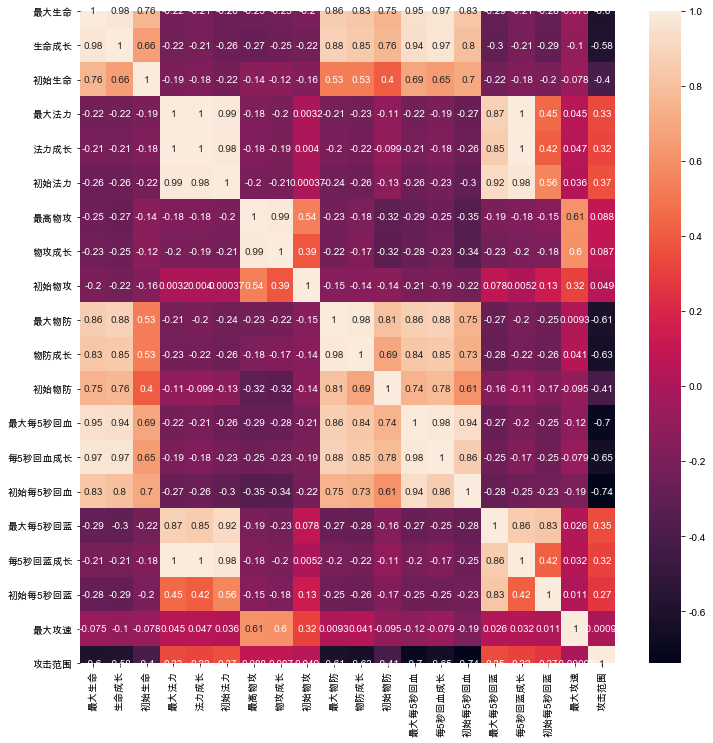

In [8]:
# 设置 plt 正确显示中文
# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # mac 设置别的字体格式
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
corr = X.corr()
# corr
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = preprocessing.StandardScaler()


In [10]:
X_ss = ss.fit_transform(X)
X_ss

array([[ 0.76655803,  0.74712079,  0.4676386 , ...,  0.06536709,
         0.49421293, -0.82639387],
       [ 0.41790601,  0.52876339, -0.36420523, ...,  0.06536709,
        -0.66174274, -0.82639387],
       [ 1.75374132,  1.38953459,  1.22530527, ..., -1.09112752,
        -0.66174274, -0.82639387],
       ...,
       [-0.34713614, -0.49973162,  0.38816307, ...,  0.52796493,
        -0.66174274, -0.82639387],
       [ 0.11906142, -0.06459912,  0.82792765, ...,  0.18101655,
         0.49421293, -0.82639387],
       [-0.96574444, -0.89372432, -1.05829149, ...,  0.18101655,
         0.49421293,  1.21007674]])

In [11]:
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
X1 =X[features_remain]


In [12]:
X1_ss = ss.fit_transform(X1)

In [13]:
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
y_pre = gmm.predict(X)
print(y_pre)
print(metrics.calinski_harabaz_score(X,y_pre))

[2 2 2 2 0 2 0 2 2 2 2 1 2 1 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 1 1 2 2 1 1 0 2 0 0 2 0 1 1 1 1]
78.52892708333935


/Users/johiroshi/anaconda3/envs/aicode/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
gmm.fit(X_ss)
y_pre_ss = gmm.predict(X_ss)
print(y_pre_ss)
print(metrics.calinski_harabaz_score(X_ss,y_pre_ss))

[2 2 0 0 2 2 2 0 0 2 0 2 0 2 0 0 2 0 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 1 2 2 1]
25.143071199475898


/Users/johiroshi/anaconda3/envs/aicode/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
gmm.fit(X1)
y_pre1 = gmm.predict(X1)
print(y_pre1)
print(metrics.calinski_harabaz_score(X1,y_pre1))

[1 0 1 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 1 1 0 0 2 1 2 2 1 2 0 0 1 0]
74.20992083385404


/Users/johiroshi/anaconda3/envs/aicode/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
gmm.fit(X1_ss)
y_pre1_ss = gmm.predict(X1_ss)
print(y_pre1_ss)
print(metrics.calinski_harabaz_score(X1_ss,y_pre1_ss))

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2]
17.807918004682936


/Users/johiroshi/anaconda3/envs/aicode/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
